# DSC510_Team_Project: Data preprocesing and Feature Engineering

## Overview of the dataset

The so-called paradoxes of an author, to which a reader takes exception, often exist not in the author's book at all, but rather in the reader's head. - Friedrich Nietzsche Books are open doors to the unimagined worlds which is unique to every person. It is more than just a hobby for many. There are many among us who prefer to spend more time with books than anything else. Here we explore a big database of books. Books of different genres, from thousands of authors. In this challenge, participants are required to use the dataset to build a Machine Learning model to predict the price of books based on a given set of features.

* Features: 
    - Title: The title of the book 
    - Author: The author(s) of the book. 
    - Edition: The edition of the book eg (Paperback,– Import, 26 Apr 2018) 
    - Reviews: The customer reviews about the book 
    - Ratings: The customer ratings of the book 
    - Synopsis: The synopsis of the book 
    - Genre: The genre the book belongs to 
    - BookCategory: The department the book is usually available at. 
    - Price: The price of the book (Target variable)
    
- Size of training set: 
    6237 records 

- Size of test set: 
    1560 records 


In [1]:
import numpy as np

random_state = 420
np.random.seed(random_state) 

##  Data load

The data was downloaded directly from the website: https://machinehack.com/hackathons/predict_the_price_of_books/overview

There were two different files, one for the training data and one of the test data (which contains no labels, thus no values for the price variable)

First, the training set was loaded into a pandas' dataframe object

In [2]:
import pandas as pd

# Loading dataset 
# engine='openpyxl' parameter is for the linux load system for excel files
train_data_df = pd.read_excel('Data_Train.xlsx', engine='openpyxl')
# Displaying the first couple of lines
train_data_df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [3]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


As it can be confirmed, indeed the features are the features-variables which were mentioned during the given overview of the dataset

Next, it was checked wether the training data has duplicate rows

In [4]:
# Select duplicate rows except first occurrence based on all columns
duplicate_rows_df = train_data_df[train_data_df.duplicated()]
duplicate_rows_df

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price


If there were duplicates from the training set, they must be removed

In [5]:
train_data_df = train_data_df.drop_duplicates()
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 487.3+ KB


Next, the test set was loaded into a pandas' dataframe object


In [6]:
test_data_df = pd.read_excel('Data_Test.xlsx', engine='openpyxl')
test_data_df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


As it was confirmed, the data has similar structure, but it does not include the Price variable

Following, the two dataframes were merged in order to continue with the preprocessing

Notice how the two segments (train and test) of the data are firstly marked in order to hold the information of wheter the observation comes from the train or test set

In [7]:
# First marking which portion of data is what
train_data_df['Set'] = 'train'
test_data_df['Set'] = 'test'

# Merging frames
data_df = pd.concat([train_data_df, test_data_df])
data_df = data_df.reset_index(drop=True)
data_df

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Set
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,train
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,train
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,train
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,train
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,train
...,...,...,...,...,...,...,...,...,...,...
7792,100 Things Every Designer Needs to Know About ...,Susan Weinschenk,"Paperback,– 14 Apr 2011",5.0 out of 5 stars,4 customer reviews,We design to elicit responses from people. We ...,Design,"Computing, Internet & Digital Media",NaN,test
7793,"Modern Letter Writing Course: Personal, Busine...",ARUN SAGAR,"Paperback,– 8 May 2013",3.6 out of 5 stars,13 customer reviews,"A 30-day course to write simple, sharp and att...",Children's Reference (Books),"Biographies, Diaries & True Accounts",NaN,test
7794,The Kite Runner Graphic Novel,Khaled Hosseini,"Paperback,– 6 Sep 2011",4.0 out of 5 stars,5 customer reviews,The perennial bestseller-now available as a se...,Humour (Books),Humour,NaN,test
7795,Panzer Leader (Penguin World War II Collection),Heinz Guderian,"Paperback,– 22 Sep 2009",3.5 out of 5 stars,3 customer reviews,Heinz Guderian - master of the Blitzkrieg and ...,United States History,"Biographies, Diaries & True Accounts",NaN,test


In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7797 entries, 0 to 7796
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         7797 non-null   object 
 1   Author        7797 non-null   object 
 2   Edition       7797 non-null   object 
 3   Reviews       7797 non-null   object 
 4   Ratings       7797 non-null   object 
 5   Synopsis      7797 non-null   object 
 6   Genre         7797 non-null   object 
 7   BookCategory  7797 non-null   object 
 8   Price         6237 non-null   float64
 9   Set           7797 non-null   object 
dtypes: float64(1), object(9)
memory usage: 609.3+ KB


Notice that only the 6237 out of the 7797 total values are present for the price variable, since the test set was not provided with any labels

## Data structure and preprocessing

During these steps, the structure and types of the variables inside the dataset were explored

### Types of features and unique values

Initially, the different features-variables are analyzed for their types

In [9]:
num_features = data_df.select_dtypes(include=['int64','float64']).columns.tolist()
print('Numerical features: ')
print(num_features, '\n')


other_features = data_df.select_dtypes(include=['object']).columns.tolist()
print('Other features: ')
print(other_features, '\n')

# Get number of unique entries in each column-feature
print('Unique values in dataset: ')
data_df.nunique()

Numerical features: 
['Price'] 

Other features: 
['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre', 'BookCategory', 'Set'] 

Unique values in dataset: 


Title           6787
Author          4372
Edition         3882
Reviews           36
Ratings          368
Synopsis        6771
Genre            363
BookCategory      11
Price           1614
Set                2
dtype: int64

As it was observed, even though there are more actual numerical features (e.g. reviews and ratings), only the price was given as an actual numerical variable.

Therefore, pre-processing was required in order to encode the different features to the desired structure.

### Authors column pre-processing

The atuhor columns needs some pre-processing since the data-text is not well structured

Specifically, it was noticed that books which have multiple authors, the author names are either separated by ',', '&', '/' or ';'. Therefore the different separation marks had to be all replaced with a consistent separator (comma in our case). 

Moreover, there were rows which had author names that had other punctiation marks which were not needed, as well as inconsistency between the upper or lower case of the text. Therefore, the not needed punctiation marks  were removed, and the author names were all lowercased.

In [10]:
# Check what kind of punctuations the authors column has
import string 

def find_unique_punctuations(texts):
  set_of_punctuations = set()
  for text in texts:
    for punc in string.punctuation:
      if punc in text:
        set_of_punctuations.add(punc)
  return set_of_punctuations

In [11]:
authors = data_df['Author'].copy()
# Fnding unique punctuation marks
find_unique_punctuations(authors)

{'!', '&', "'", '(', ')', ',', '-', '.', '/', ';'}

In [12]:
# Removing the punctuations which do not give any information
punctuations_to_remove = ['(',')','!',"'",'.']
punctuations_to_replace_with_space = ['-']
 # Replcaing the punctuations that are used to partiotion the different authors
punctuations_to_replace_with_comma = ['&', '/', ';']


# Function with preprocess the authors
# Makes the text to lowercase and handling the different
# punctuations ideally
def handle_author_text(text):
   # Makes the text to lowercase
   text = text.lower()

   # Handling each punctuation case 
   for punctuation in punctuations_to_remove:
     text = text.replace(punctuation, '')
   for punctuation in punctuations_to_replace_with_comma:
     text = text.replace(punctuation, ', ')
   for punctuation in punctuations_to_replace_with_space:
     text = text.replace(punctuation, ' ')

   return text

To see if the pre-processing steps were for benefit, the unique text of the author column should be less than before.

In [13]:
authors = authors.apply(handle_author_text)
authors.nunique()

4343

Indeed, there were minor improvements since the unique authors have been reduced by almost 30.

### Adding meta-feature: Number of Authors

In order to add extra features to our data, the number of authors were calculated.

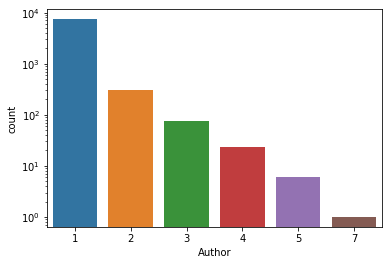

In [14]:
import seaborn as sns

# Make integers based of different authors
def count_authors(text):
  return text.count(',')+1

num_of_authors = authors.apply(count_authors)
ax = sns.countplot(x="Author", data=num_of_authors.to_frame())
ax.set_yscale("log")
#data = num_of_authors.to_frame()

### Ratings pre-processing

As it was already mentioned, the rating column included text instead of the actual number of the ratings, therefore it was essential to pre-process the text and extract only the number of the ratings 

To add, the ratings are not exactly the ratings of the books, but the number of customers which reviewed the books

In [15]:
ratings = data_df['Ratings']
ratings

0        8 customer reviews
1       14 customer reviews
2        6 customer reviews
3       13 customer reviews
4         1 customer review
               ...         
7792     4 customer reviews
7793    13 customer reviews
7794     5 customer reviews
7795     3 customer reviews
7796     2 customer reviews
Name: Ratings, Length: 7797, dtype: object

In [16]:
# Split rows into lists
def split_to_lists(a_string, char_for_split=','):
    split_list = a_string.split()
    return split_list

ratings = ratings.apply(split_to_lists)
ratings

0        [8, customer, reviews]
1       [14, customer, reviews]
2        [6, customer, reviews]
3       [13, customer, reviews]
4         [1, customer, review]
                 ...           
7792     [4, customer, reviews]
7793    [13, customer, reviews]
7794     [5, customer, reviews]
7795     [3, customer, reviews]
7796     [2, customer, reviews]
Name: Ratings, Length: 7797, dtype: object

First checking for wrong values or problems for the elements of the list (i.e. non number rating or non consistent etc)

In [17]:
# First checking for wrong values or problems for the elements
# of the list (i.e. non number rating or non consistent etc)

def check_consistency_ratings(ratings):
    consistent_lists_elements = len(ratings[0])

    for i in range(0, len(ratings)):
        if len(ratings[i]) != consistent_lists_elements:
            print("in", i, "row the length is not consistent")
            return
        if ratings[i][1] != 'customer':
            print("in",i,"row does not have customer")
            return
        if (ratings[i][2] != 'reviews') and (ratings[i][2]!='review'):
            print("in",i,"row does not have reviews")
            return

    print('Ratings do not have any problematic values')
    return(True)

check_consistency_ratings(ratings)

Ratings do not have any problematic values


True

Extracting the actual numbers from the columns using regex

In [18]:
import re

# Keep only the ratings from the rows
ratings_num = [int(re.sub(r'[^\w\s]', '', rating[0])) for rating in ratings]

In [19]:
ratings_num[0:10]

[8, 14, 6, 13, 1, 8, 72, 16, 111, 1]

### Reviews pre-processing

The reviews score (which actually is the average review-rating of the book) takes values from 0 to 5 stars, but simiarly with the ratings column, the data column needs pre-processing to extract the scores from the text

In [20]:
reviews = data_df['Reviews']
reviews

0       4.0 out of 5 stars
1       3.9 out of 5 stars
2       4.8 out of 5 stars
3       4.1 out of 5 stars
4       5.0 out of 5 stars
               ...        
7792    5.0 out of 5 stars
7793    3.6 out of 5 stars
7794    4.0 out of 5 stars
7795    3.5 out of 5 stars
7796    4.5 out of 5 stars
Name: Reviews, Length: 7797, dtype: object

In [21]:
reviews = reviews.apply(split_to_lists)
reviews

0       [4.0, out, of, 5, stars]
1       [3.9, out, of, 5, stars]
2       [4.8, out, of, 5, stars]
3       [4.1, out, of, 5, stars]
4       [5.0, out, of, 5, stars]
                  ...           
7792    [5.0, out, of, 5, stars]
7793    [3.6, out, of, 5, stars]
7794    [4.0, out, of, 5, stars]
7795    [3.5, out, of, 5, stars]
7796    [4.5, out, of, 5, stars]
Name: Reviews, Length: 7797, dtype: object

In [22]:
# First checking for wrong values or problems for the elements
# of the list (i.e. non number rating or non consistent etc)

def check_consistency_reviews(reviews):
    consistent_lists_elements = len(reviews[0])

    for i in range(0, len(reviews)):
        if len(reviews[i]) != consistent_lists_elements:
            print("in", i, "row the length is not consistent")
            return
        if reviews[i][1] != 'out':
            print("in",i,"row does not have out")
            return
        if reviews[i][2] != 'of':
            print("in",i,"row does not have of")
            return
        if reviews[i][3] != '5':
            print("in",i,"row does not have 5")
            return   
        if reviews[i][4] != 'stars':
            print("in",i,"row does not have stars")
            return       
        if (float(reviews[i][0]) > 5) or (float(reviews[i][0]) < 0):
            print("in",i, "row has an out of range review score")
            return

    print('Reviews do not have any problematic values')
    return(True)

check_consistency_reviews(reviews)

Reviews do not have any problematic values


True

In [23]:
# Keep only the rating from the rows
reviews_num = [float(review[0]) for review in reviews]
reviews_num[0:10]

[4.0, 3.9, 4.8, 4.1, 5.0, 4.5, 4.4, 4.7, 4.2, 4.0]

### Title-Synopsis pre-processing

The two columns were supposed to have text for the title and synopsis of the different books. 

The problem was that there were some books wich included text that was not in English, since the dataset is taken from an Indian website.

Therefore, it was essential to first translate the text to English.

In [24]:
#!pip3 uninstall googletrans
#!pip install googletrans==4.0.0rc1

To translate the text, the Googletrans library was utilized. 

Googletrans is a free and unlimited python library that implemented Google Translate API. It uses the Google Translate Ajax API to make calls to such methods as detect and translate.

In [25]:
# Initilize packages for translation
from googletrans import Translator, constants
from pprint import pprint

It was chosen to merge both the title and synopsis text, in order to further analyze-process the whole textual part of the data

In [26]:
titles_synopses = data_df['Title'] + " " + data_df['Synopsis']
titles_synopses

0       The Prisoner's Gold (The Hunters 3) THE HUNTER...
1       Guru Dutt: A Tragedy in Three Acts A layered p...
2       Leviathan (Penguin Classics) "During the time ...
3       A Pocket Full of Rye (Miss Marple) A handful o...
4       LIFE 70 Years of Extraordinary Photography For...
                              ...                        
7792    100 Things Every Designer Needs to Know About ...
7793    Modern Letter Writing Course: Personal, Busine...
7794    The Kite Runner Graphic Novel The perennial be...
7795    Panzer Leader (Penguin World War II Collection...
7796    Complete Spanish Step-by-Step Learn Spanish wi...
Length: 7797, dtype: object

The procedure was as follows:
 - First make a call to the Google Translate API, and detect the language of the text
 - If the language of the text was English, then keep the text as it is
 - If the language was not English, use the Google Translate API to make a call for translation, and save the translated version of the text
 
Notice that for the different calls the time.sleep() function is used, in order to temporarily suspend the execution of the current thread for a given number of seconds. The function was used since Google's API does not permit the non-stop calling.

Thus, due to the usual interruption of the working threads, the whole translation procedure takes some hours to complete.

In [27]:
import os
from tqdm import tqdm
import time

# If the translation file is not found, then run the translation process
# and save the new .csv file with the translated titles_synopses
if not os.path.exists('titles_synopses_df.csv'):

  translator = Translator()
  translator.raise_Exception = True

  # Initilize the Google API translator
  new_titles_synopses = []
  for i, synopsis in enumerate(tqdm(titles_synopses)):
      # Using a sleep timer in order not to get timetout from google's API
      time.sleep(0.25)
      # Detect the language
      try:
        detection = translator.detect(synopsis)
        # If language is english with high confidence then don't translate
        if not ((detection.lang == "en")):
          translation = translator.translate(synopsis, dest="en")
          print(f"{translation.origin} ({translation.src}) --> {translation.text} ({translation.dest})")
          new_titles_synopses.append(translation.text)
        else:
          new_titles_synopses.append(synopsis)
      except Exception as e:
          print(e, "for document", i)
          new_titles_synopses.append(synopsis)
          
  # Calling DataFrame constructor on list
  new_titles_synopses_df = pd.DataFrame(new_titles_synopses)
  new_titles_synopses_df.to_csv('titles_synopses_df.csv', index=False)

else:
  # Else load the translated text from the .csv file
  translated_titles_synopses_df = pd.read_csv('titles_synopses_df.csv')
  translated_titles_synopses_df = translated_titles_synopses_df.rename(columns={'0': 'translated_titles_synopses'})
  print("\n Final Translated text: ")
  print(translated_titles_synopses_df)


 Final Translated text: 
                             translated_titles_synopses
0     The Prisoner's Gold (The Hunters 3) THE HUNTER...
1     Guru Dutt: A Tragedy in Three Acts A layered p...
2     Leviathan (Penguin Classics) "During the time ...
3     A Pocket Full of Rye (Miss Marple) A handful o...
4     LIFE 70 Years of Extraordinary Photography For...
...                                                 ...
7792  100 Things Every Designer Needs to Know About ...
7793  Modern Letter Writing Course: Personal, Busine...
7794  The Kite Runner Graphic Novel The perennial be...
7795  Panzer Leader (Penguin World War II Collection...
7796  Complete Spanish Step-by-Step Learn Spanish wi...

[7797 rows x 1 columns]


Saving the translated text to a .csv file in order to not run it again after the notebook is executed again

In [28]:
translated_titles_synopses_df = pd.read_csv('titles_synopses_df.csv')
translated_titles_synopses_df = translated_titles_synopses_df.rename(columns={'0': 'translated_titles_synopses'})

print("\n Final Translated text: ")
print(translated_titles_synopses_df)


 Final Translated text: 
                             translated_titles_synopses
0     The Prisoner's Gold (The Hunters 3) THE HUNTER...
1     Guru Dutt: A Tragedy in Three Acts A layered p...
2     Leviathan (Penguin Classics) "During the time ...
3     A Pocket Full of Rye (Miss Marple) A handful o...
4     LIFE 70 Years of Extraordinary Photography For...
...                                                 ...
7792  100 Things Every Designer Needs to Know About ...
7793  Modern Letter Writing Course: Personal, Busine...
7794  The Kite Runner Graphic Novel The perennial be...
7795  Panzer Leader (Penguin World War II Collection...
7796  Complete Spanish Step-by-Step Learn Spanish wi...

[7797 rows x 1 columns]


Following, preprocessing of the text was as followed:

- Remove possible HTML code
- Expande contractions
- Remove punctuations
- Remove stop words
- Lematize words

In [29]:
from bs4 import BeautifulSoup
import string # punctuation characters in string.punctuation
import contractions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
punctuation = string.punctuation
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = stopwords.words('english')
ps = nltk.PorterStemmer()
wl = nltk.WordNetLemmatizer()


# Remove html tags. Get a string as input and return the string without html tags.
def remove_htmltags(html):
    return BeautifulSoup(html).get_text()

# Expanding contractions
def expand_contractions(text):
    return contractions.fix(text)

def remove_punct(text):
    text = "".join([char for char in text if char not in punctuation])
    return text

def remove_stopwords(text):
    tokens = word_tokenize(text.lower())
    text = " ".join([word for word in tokens if word not in stop_words])
    return text 

# def stemming(text):
#     tokens = word_tokenize(text)
#     stemmed_text=" ".join([wl.lemmatize(word) for word in tokens])
#     return stemmed_text

def lemmatizing(text):
    tokens = word_tokenize(text)
    lemmatized_text=" ".join([wl.lemmatize(word) for word in tokens])
    return lemmatized_text


[nltk_data] Downloading package stopwords to /home/nick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/nick/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/nick/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
preprossed_translated_titles_synopses = translated_titles_synopses_df['translated_titles_synopses'].copy()

# Applying text preprocessing
preprossed_translated_titles_synopses = preprossed_translated_titles_synopses.map(lambda l: remove_htmltags(l))
preprossed_translated_titles_synopses = preprossed_translated_titles_synopses.map(lambda l: remove_punct(l))
preprossed_translated_titles_synopses = preprossed_translated_titles_synopses.map(lambda l: expand_contractions(l))
preprossed_translated_titles_synopses = preprossed_translated_titles_synopses.map(lambda l: remove_stopwords(l))
#preprossed_translated_titles_synopses = preprossed_translated_titles_synopses.map(lambda l: stemming(l))
preprossed_translated_titles_synopses = preprossed_translated_titles_synopses.map(lambda l: lemmatizing(l))

preprossed_translated_titles_synopses

0       prisoner gold hunter 3 hunter return third bri...
1       guru dutt tragedy three act layered portrait t...
2       leviathan penguin classic time men live withou...
3       pocket full rye miss marple handful grain foun...
4       life 70 year extraordinary photography seven d...
                              ...                        
7792    100 thing every designer need know people voic...
7793    modern letter writing course personal business...
7794    kite runner graphic novel perennial bestseller...
7795    panzer leader penguin world war ii collection ...
7796    complete spanish stepbystep learn spanish conv...
Name: translated_titles_synopses, Length: 7797, dtype: object

### Extractng topics as new features from the title and synopsis

Since the textual data have to be encoded as features with either the simple bag-of-words model or the TF-IDF approach, it was needed to use a high amount of new features.

In order to avoid that approach, and use a lower amount of features, it was decided to use 
Topic Modelling by utilizing Latent Dirichlet Allocation (LDA). The initial idea was to form clusters of the documents (synopseses in our case), but just having clusters as features is not always helpful.

### Topic Modelling with LDA (Latent Dirichlet Allocation)

Topic modeling algorithms are statistical methods that analyze the words of the original texts to discover the themes that run through them, how those themes are connected to each other, and how they change over time (Blei, 2012).

All topic models are based on the same basic assumption: each document-text consists of a distribution over topics, and each topic consists of a distribution over words.

LDA is one of the most popular techniques for topic extraction. The extracted topics generate words based on their probability distribution. Given a dataset of documents, LDA backtracks and tries to figure out what topics would create those documents in the first place.

The nice part of LDA, is that it actually provides for each document which topics appear in it and to which percentage. (For example, for a manga book which talks about a Jappenese Ninja story, may consist of the topic mix 48% Manga, 31% Ninja and 21% Jappanese).

Topic modeling algorithms are generally implemented TF-IDF values. In order to fit the textual data to the LDA algorithm, the text of the different books must be first encoded to a TF-IDF matrix.

In [31]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(use_idf=True, norm='l2',ngram_range=(1, 1), max_df=0.9, min_df=0.001)
tfidf_text = tfidf_vec.fit_transform(preprossed_translated_titles_synopses)
print('TF-IDF output shape:', tfidf_text.shape)

# n_components is the number of topics
lda_model = LatentDirichletAllocation(n_components=25, random_state=random_state)
lda_top = lda_model.fit_transform(tfidf_text)
print(lda_top.shape) 
print('LDA output shape:', lda_top.shape) # (no_of_doc,no_of_topics)
print("Final perplexity score on document set: ", lda_model.bound_)

TF-IDF output shape: (7797, 9329)
(7797, 25)
LDA output shape: (7797, 25)
Final perplexity score on document set:  41137.70813985606


It was chosen to use 25 topics instead of the diffult 10 of the sklearn LDA package. Usually the more number of topics used, the more accurate topics are going to be extracted.
In this work, 25 topics were used since it was seen that the formed 25 topics are non that eterogenous, and more than 25 new features would have been too much for the prediction algorithms.

Prnting the percentages of each topic that the synopsis and title of the first book belong to

In [32]:
# Composition of doc 0
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  0.5399945518871808 %
Topic  1 :  0.5399945518953279 %
Topic  2 :  0.5399945518890839 %
Topic  3 :  0.5399945518871712 %
Topic  4 :  0.5399945518910969 %
Topic  5 :  0.5399945518875248 %
Topic  6 :  0.5399945518914998 %
Topic  7 :  0.5399945518970614 %
Topic  8 :  0.5399945518947622 %
Topic  9 :  13.717734124255612 %
Topic  10 :  0.5399945518918946 %
Topic  11 :  0.5399945519447173 %
Topic  12 :  0.5399945518871712 %
Topic  13 :  0.5399945518871712 %
Topic  14 :  0.53999455191609 %
Topic  15 :  0.5399945518871712 %
Topic  16 :  0.5399945518891088 %
Topic  17 :  0.5399945518893136 %
Topic  18 :  73.86239118198584 %
Topic  19 :  0.5399945518905722 %
Topic  20 :  0.5399945518871897 %
Topic  21 :  0.5399945520977739 %
Topic  22 :  0.5399945518871712 %
Topic  23 :  0.5399945518952706 %
Topic  24 :  0.5399945518872152 %


Printing the most likely topic of each synopsis-title of the books

In [33]:
# Most likely topic for all docs
for i, doc in enumerate(lda_top):
    print("Document:", i)
    print("Most likely topic: ", np.argmax(doc), ": ",max(doc)*100,"%" )

Document: 0
Most likely topic:  18 :  73.86239118198584 %
Document: 1
Most likely topic:  9 :  49.57733695075461 %
Document: 2
Most likely topic:  9 :  79.5289450202273 %
Document: 3
Most likely topic:  9 :  43.53355411970462 %
Document: 4
Most likely topic:  9 :  55.71113479268013 %
Document: 5
Most likely topic:  21 :  58.31792544965241 %
Document: 6
Most likely topic:  9 :  61.104361513502795 %
Document: 7
Most likely topic:  21 :  56.12266503551264 %
Document: 8
Most likely topic:  9 :  71.14447692593225 %
Document: 9
Most likely topic:  18 :  46.50683659688467 %
Document: 10
Most likely topic:  9 :  61.718765267791106 %
Document: 11
Most likely topic:  9 :  48.79646663922975 %
Document: 12
Most likely topic:  18 :  47.53994030010003 %
Document: 13
Most likely topic:  21 :  58.454594218566356 %
Document: 14
Most likely topic:  18 :  55.158999198345136 %
Document: 15
Most likely topic:  9 :  50.98399677178317 %
Document: 16
Most likely topic:  9 :  69.81502958701455 %
Document: 17
M

Most likely topic:  9 :  66.54912895477206 %
Document: 284
Most likely topic:  9 :  55.612718054050184 %
Document: 285
Most likely topic:  9 :  47.73540104202446 %
Document: 286
Most likely topic:  9 :  62.205974458842114 %
Document: 287
Most likely topic:  9 :  41.77444313185642 %
Document: 288
Most likely topic:  9 :  72.44599858115814 %
Document: 289
Most likely topic:  18 :  49.00034640726283 %
Document: 290
Most likely topic:  18 :  56.56367720504877 %
Document: 291
Most likely topic:  9 :  55.62167030833898 %
Document: 292
Most likely topic:  9 :  57.23373366306359 %
Document: 293
Most likely topic:  21 :  71.88774292174254 %
Document: 294
Most likely topic:  9 :  80.17610293510594 %
Document: 295
Most likely topic:  9 :  54.035834042942874 %
Document: 296
Most likely topic:  18 :  31.992494583546392 %
Document: 297
Most likely topic:  9 :  44.681601136715784 %
Document: 298
Most likely topic:  9 :  51.921842933285475 %
Document: 299
Most likely topic:  9 :  42.92035371628694 %
D

Document: 473
Most likely topic:  18 :  66.7197994966286 %
Document: 474
Most likely topic:  9 :  65.7136218408364 %
Document: 475
Most likely topic:  9 :  71.1212443713909 %
Document: 476
Most likely topic:  9 :  64.53762989692652 %
Document: 477
Most likely topic:  9 :  61.203707646338856 %
Document: 478
Most likely topic:  21 :  64.920263975107 %
Document: 479
Most likely topic:  18 :  42.239821010831605 %
Document: 480
Most likely topic:  9 :  35.46087098108637 %
Document: 481
Most likely topic:  21 :  83.42512124048017 %
Document: 482
Most likely topic:  21 :  65.61611225053878 %
Document: 483
Most likely topic:  21 :  60.59075465141939 %
Document: 484
Most likely topic:  9 :  53.01801477409046 %
Document: 485
Most likely topic:  9 :  52.58870051985335 %
Document: 486
Most likely topic:  18 :  41.32782314950814 %
Document: 487
Most likely topic:  9 :  51.71270068592697 %
Document: 488
Most likely topic:  9 :  57.293103885369575 %
Document: 489
Most likely topic:  9 :  44.218615572

Most likely topic:  18 :  34.5937891408913 %
Document: 624
Most likely topic:  9 :  45.211453568905725 %
Document: 625
Most likely topic:  9 :  59.82851266208722 %
Document: 626
Most likely topic:  9 :  66.55851289553497 %
Document: 627
Most likely topic:  21 :  73.71985569611887 %
Document: 628
Most likely topic:  18 :  32.63568738097546 %
Document: 629
Most likely topic:  9 :  66.27912761613922 %
Document: 630
Most likely topic:  21 :  73.50559145816203 %
Document: 631
Most likely topic:  9 :  58.354812577838246 %
Document: 632
Most likely topic:  15 :  32.220740565434134 %
Document: 633
Most likely topic:  9 :  53.507660157530815 %
Document: 634
Most likely topic:  9 :  44.50277945101259 %
Document: 635
Most likely topic:  9 :  84.0591308719472 %
Document: 636
Most likely topic:  9 :  44.02527263472811 %
Document: 637
Most likely topic:  9 :  42.37425541222971 %
Document: 638
Most likely topic:  21 :  77.17130026579929 %
Document: 639
Most likely topic:  9 :  50.849369955882906 %
Do

Most likely topic:  9 :  51.783892548279056 %
Document: 876
Most likely topic:  21 :  72.5365680656984 %
Document: 877
Most likely topic:  21 :  38.384447200499125 %
Document: 878
Most likely topic:  18 :  68.75637404676365 %
Document: 879
Most likely topic:  18 :  39.620592278648154 %
Document: 880
Most likely topic:  9 :  76.20827599334021 %
Document: 881
Most likely topic:  18 :  43.02349543403348 %
Document: 882
Most likely topic:  18 :  40.66718694640514 %
Document: 883
Most likely topic:  9 :  44.894138624634735 %
Document: 884
Most likely topic:  9 :  47.649343756151765 %
Document: 885
Most likely topic:  9 :  58.06729365560604 %
Document: 886
Most likely topic:  21 :  52.123615373554784 %
Document: 887
Most likely topic:  9 :  55.82866718058678 %
Document: 888
Most likely topic:  9 :  63.16215062509312 %
Document: 889
Most likely topic:  9 :  44.976656319932275 %
Document: 890
Most likely topic:  9 :  57.616174663619105 %
Document: 891
Most likely topic:  9 :  69.87312738996113

Most likely topic:  9 :  40.28153221606235 %
Document: 1099
Most likely topic:  18 :  58.83629335602748 %
Document: 1100
Most likely topic:  9 :  53.42999306930768 %
Document: 1101
Most likely topic:  9 :  42.849035851736716 %
Document: 1102
Most likely topic:  9 :  45.14930986382491 %
Document: 1103
Most likely topic:  9 :  56.31171765328674 %
Document: 1104
Most likely topic:  9 :  62.03336167641572 %
Document: 1105
Most likely topic:  21 :  71.71522064860085 %
Document: 1106
Most likely topic:  18 :  52.16351655380229 %
Document: 1107
Most likely topic:  18 :  47.24853366381129 %
Document: 1108
Most likely topic:  9 :  47.21690405837173 %
Document: 1109
Most likely topic:  18 :  37.2018377412897 %
Document: 1110
Most likely topic:  9 :  65.86741149621902 %
Document: 1111
Most likely topic:  7 :  80.2315659225223 %
Document: 1112
Most likely topic:  21 :  68.64422494699055 %
Document: 1113
Most likely topic:  9 :  64.95026017116392 %
Document: 1114
Most likely topic:  9 :  68.6106917

Most likely topic:  9 :  45.300613855453506 %
Document: 1406
Most likely topic:  18 :  53.28470912056109 %
Document: 1407
Most likely topic:  9 :  61.73642014955645 %
Document: 1408
Most likely topic:  9 :  63.88489300934934 %
Document: 1409
Most likely topic:  18 :  46.38771770332168 %
Document: 1410
Most likely topic:  9 :  49.30876407010167 %
Document: 1411
Most likely topic:  21 :  64.9130736232132 %
Document: 1412
Most likely topic:  9 :  83.3940648302583 %
Document: 1413
Most likely topic:  9 :  46.39912829145773 %
Document: 1414
Most likely topic:  18 :  50.93289258711812 %
Document: 1415
Most likely topic:  21 :  79.5929326443286 %
Document: 1416
Most likely topic:  21 :  45.87384255059591 %
Document: 1417
Most likely topic:  9 :  46.618651911315254 %
Document: 1418
Most likely topic:  9 :  83.93248596821242 %
Document: 1419
Most likely topic:  18 :  44.93669849712767 %
Document: 1420
Most likely topic:  9 :  67.82187633042028 %
Document: 1421
Most likely topic:  9 :  36.127423

Most likely topic:  18 :  55.158999198345136 %
Document: 1800
Most likely topic:  9 :  61.07834533849182 %
Document: 1801
Most likely topic:  9 :  44.14960541730871 %
Document: 1802
Most likely topic:  9 :  37.60704820578891 %
Document: 1803
Most likely topic:  9 :  53.01801477409046 %
Document: 1804
Most likely topic:  21 :  47.06622905648508 %
Document: 1805
Most likely topic:  21 :  39.23267335594506 %
Document: 1806
Most likely topic:  21 :  68.97806432301975 %
Document: 1807
Most likely topic:  9 :  47.637328061346516 %
Document: 1808
Most likely topic:  18 :  52.25480540326611 %
Document: 1809
Most likely topic:  9 :  72.05267943570746 %
Document: 1810
Most likely topic:  18 :  52.14119742782203 %
Document: 1811
Most likely topic:  9 :  56.30776545560102 %
Document: 1812
Most likely topic:  9 :  36.277167885198246 %
Document: 1813
Most likely topic:  9 :  43.69226127600409 %
Document: 1814
Most likely topic:  9 :  90.73114138403243 %
Document: 1815
Most likely topic:  9 :  49.150

Most likely topic:  9 :  51.832510534641216 %
Document: 2155
Most likely topic:  9 :  71.2683439791141 %
Document: 2156
Most likely topic:  9 :  60.32299294104838 %
Document: 2157
Most likely topic:  9 :  68.91148447827725 %
Document: 2158
Most likely topic:  9 :  46.357171760074365 %
Document: 2159
Most likely topic:  18 :  41.31164761331566 %
Document: 2160
Most likely topic:  9 :  67.91484865728283 %
Document: 2161
Most likely topic:  9 :  54.93716550857651 %
Document: 2162
Most likely topic:  21 :  47.519691275182666 %
Document: 2163
Most likely topic:  9 :  67.21150267165957 %
Document: 2164
Most likely topic:  9 :  48.61147361626033 %
Document: 2165
Most likely topic:  9 :  41.83121317742159 %
Document: 2166
Most likely topic:  9 :  67.4434224898729 %
Document: 2167
Most likely topic:  9 :  72.49867955344597 %
Document: 2168
Most likely topic:  21 :  51.92896833146059 %
Document: 2169
Most likely topic:  9 :  44.91901150698372 %
Document: 2170
Most likely topic:  18 :  41.7418358

Most likely topic:  18 :  38.15643692393769 %
Document: 2476
Most likely topic:  9 :  46.79064721080287 %
Document: 2477
Most likely topic:  23 :  88.11810798700256 %
Document: 2478
Most likely topic:  9 :  58.876865227989775 %
Document: 2479
Most likely topic:  9 :  50.8632211542219 %
Document: 2480
Most likely topic:  18 :  49.808967549878645 %
Document: 2481
Most likely topic:  18 :  57.25695777863182 %
Document: 2482
Most likely topic:  21 :  77.6348187474451 %
Document: 2483
Most likely topic:  9 :  64.55013071506905 %
Document: 2484
Most likely topic:  9 :  52.236479751188405 %
Document: 2485
Most likely topic:  9 :  39.21346530821914 %
Document: 2486
Most likely topic:  9 :  58.04203197154649 %
Document: 2487
Most likely topic:  9 :  42.54694465378557 %
Document: 2488
Most likely topic:  18 :  46.65115553280813 %
Document: 2489
Most likely topic:  9 :  39.408068670154584 %
Document: 2490
Most likely topic:  9 :  45.63973939711109 %
Document: 2491
Most likely topic:  9 :  47.0529

Most likely topic:  21 :  52.91540868488617 %
Document: 2840
Most likely topic:  9 :  71.54547038653479 %
Document: 2841
Most likely topic:  7 :  75.57634166874118 %
Document: 2842
Most likely topic:  9 :  71.94207409782797 %
Document: 2843
Most likely topic:  18 :  41.06429419249155 %
Document: 2844
Most likely topic:  18 :  37.13274031141574 %
Document: 2845
Most likely topic:  21 :  62.258176454043145 %
Document: 2846
Most likely topic:  21 :  70.26066661861529 %
Document: 2847
Most likely topic:  9 :  49.23464595850083 %
Document: 2848
Most likely topic:  9 :  33.61265989976558 %
Document: 2849
Most likely topic:  18 :  56.45419024113713 %
Document: 2850
Most likely topic:  9 :  80.96651145847662 %
Document: 2851
Most likely topic:  9 :  56.84332791659139 %
Document: 2852
Most likely topic:  9 :  70.75740488224483 %
Document: 2853
Most likely topic:  21 :  56.737589752071585 %
Document: 2854
Most likely topic:  24 :  34.689962601608734 %
Document: 2855
Most likely topic:  9 :  42.3

Document: 3160
Most likely topic:  9 :  79.07050129449699 %
Document: 3161
Most likely topic:  18 :  54.1832750008564 %
Document: 3162
Most likely topic:  21 :  82.9135402926769 %
Document: 3163
Most likely topic:  18 :  51.096383166162404 %
Document: 3164
Most likely topic:  18 :  72.70871757973579 %
Document: 3165
Most likely topic:  21 :  61.5585026854865 %
Document: 3166
Most likely topic:  21 :  65.7473745444197 %
Document: 3167
Most likely topic:  9 :  68.50544732626376 %
Document: 3168
Most likely topic:  9 :  55.78867160720651 %
Document: 3169
Most likely topic:  9 :  56.958925358708015 %
Document: 3170
Most likely topic:  18 :  67.8436200639173 %
Document: 3171
Most likely topic:  9 :  41.416076102757856 %
Document: 3172
Most likely topic:  9 :  43.77796069491195 %
Document: 3173
Most likely topic:  21 :  59.580113306756985 %
Document: 3174
Most likely topic:  9 :  45.50914752259357 %
Document: 3175
Most likely topic:  9 :  43.89395378979211 %
Document: 3176
Most likely topic:

Most likely topic:  9 :  56.05661366990593 %
Document: 3526
Most likely topic:  9 :  47.906826516888565 %
Document: 3527
Most likely topic:  8 :  52.23626761184709 %
Document: 3528
Most likely topic:  9 :  59.22535934446799 %
Document: 3529
Most likely topic:  9 :  34.05425180224154 %
Document: 3530
Most likely topic:  9 :  84.38013559752527 %
Document: 3531
Most likely topic:  21 :  66.83749884199204 %
Document: 3532
Most likely topic:  9 :  75.22673182032533 %
Document: 3533
Most likely topic:  9 :  82.28121640034912 %
Document: 3534
Most likely topic:  9 :  50.059380277294686 %
Document: 3535
Most likely topic:  9 :  35.15096947137746 %
Document: 3536
Most likely topic:  9 :  56.934926835208586 %
Document: 3537
Most likely topic:  9 :  62.99270119973066 %
Document: 3538
Most likely topic:  9 :  55.17650234310334 %
Document: 3539
Most likely topic:  18 :  39.45354279414149 %
Document: 3540
Most likely topic:  9 :  66.33873990903642 %
Document: 3541
Most likely topic:  9 :  49.7940608

Most likely topic:  21 :  53.763866134188476 %
Document: 3855
Most likely topic:  9 :  57.94628471461082 %
Document: 3856
Most likely topic:  18 :  88.90319774538155 %
Document: 3857
Most likely topic:  21 :  62.84044680960514 %
Document: 3858
Most likely topic:  18 :  43.64761645891501 %
Document: 3859
Most likely topic:  9 :  61.830591389339794 %
Document: 3860
Most likely topic:  9 :  60.03831339961594 %
Document: 3861
Most likely topic:  21 :  58.39840261913817 %
Document: 3862
Most likely topic:  9 :  81.50480310507525 %
Document: 3863
Most likely topic:  9 :  60.42363066659817 %
Document: 3864
Most likely topic:  9 :  54.19313502215547 %
Document: 3865
Most likely topic:  9 :  54.616771443107915 %
Document: 3866
Most likely topic:  21 :  73.53522214307289 %
Document: 3867
Most likely topic:  18 :  55.41891355743521 %
Document: 3868
Most likely topic:  18 :  27.23023375125921 %
Document: 3869
Most likely topic:  21 :  65.96543192155778 %
Document: 3870
Most likely topic:  9 :  60.

Most likely topic:  18 :  64.46632018816398 %
Document: 4257
Most likely topic:  4 :  53.683495171132336 %
Document: 4258
Most likely topic:  9 :  76.94857439036163 %
Document: 4259
Most likely topic:  21 :  86.13408864382616 %
Document: 4260
Most likely topic:  21 :  44.05837289544709 %
Document: 4261
Most likely topic:  18 :  29.879727562366178 %
Document: 4262
Most likely topic:  9 :  32.43296397958349 %
Document: 4263
Most likely topic:  9 :  55.54503683856913 %
Document: 4264
Most likely topic:  9 :  41.77444313185642 %
Document: 4265
Most likely topic:  21 :  90.54410164626063 %
Document: 4266
Most likely topic:  9 :  33.65240836503801 %
Document: 4267
Most likely topic:  9 :  42.19704798796467 %
Document: 4268
Most likely topic:  18 :  50.94505692320656 %
Document: 4269
Most likely topic:  9 :  54.86818172123192 %
Document: 4270
Most likely topic:  9 :  47.56734172033772 %
Document: 4271
Most likely topic:  18 :  40.6900496917427 %
Document: 4272
Most likely topic:  18 :  58.720

Most likely topic:  9 :  58.25132665859557 %
Document: 4569
Most likely topic:  9 :  49.475894182498905 %
Document: 4570
Most likely topic:  21 :  49.77477257574402 %
Document: 4571
Most likely topic:  21 :  70.81669371693008 %
Document: 4572
Most likely topic:  21 :  61.18015590459906 %
Document: 4573
Most likely topic:  9 :  55.996726403933685 %
Document: 4574
Most likely topic:  9 :  78.76670122999691 %
Document: 4575
Most likely topic:  9 :  54.03577384978894 %
Document: 4576
Most likely topic:  18 :  47.86963179221471 %
Document: 4577
Most likely topic:  18 :  36.345328613469455 %
Document: 4578
Most likely topic:  9 :  41.867548306175664 %
Document: 4579
Most likely topic:  21 :  59.73588527763107 %
Document: 4580
Most likely topic:  21 :  54.50176861625858 %
Document: 4581
Most likely topic:  9 :  52.981460456536 %
Document: 4582
Most likely topic:  21 :  59.538692314656586 %
Document: 4583
Most likely topic:  9 :  69.24296997134581 %
Document: 4584
Most likely topic:  9 :  70.4

Most likely topic:  9 :  50.799163794829326 %
Document: 4978
Most likely topic:  9 :  49.548835385849344 %
Document: 4979
Most likely topic:  9 :  40.47937768705929 %
Document: 4980
Most likely topic:  9 :  45.316778662083046 %
Document: 4981
Most likely topic:  9 :  69.73167325522874 %
Document: 4982
Most likely topic:  9 :  69.94678145648709 %
Document: 4983
Most likely topic:  9 :  49.13908933988232 %
Document: 4984
Most likely topic:  9 :  51.74844912003358 %
Document: 4985
Most likely topic:  21 :  46.88566693051284 %
Document: 4986
Most likely topic:  18 :  42.368211618836185 %
Document: 4987
Most likely topic:  9 :  69.67458200752709 %
Document: 4988
Most likely topic:  9 :  40.13208775143964 %
Document: 4989
Most likely topic:  9 :  49.1591149778906 %
Document: 4990
Most likely topic:  21 :  73.8577526309553 %
Document: 4991
Most likely topic:  9 :  40.09078000997337 %
Document: 4992
Most likely topic:  9 :  40.0048089865094 %
Document: 4993
Most likely topic:  18 :  74.4828898

Document: 5335
Most likely topic:  9 :  73.18842891674487 %
Document: 5336
Most likely topic:  9 :  44.99040789498564 %
Document: 5337
Most likely topic:  9 :  72.45621247820748 %
Document: 5338
Most likely topic:  9 :  56.03005977685596 %
Document: 5339
Most likely topic:  9 :  43.46818880350225 %
Document: 5340
Most likely topic:  9 :  43.49808618092554 %
Document: 5341
Most likely topic:  21 :  84.10589080276173 %
Document: 5342
Most likely topic:  18 :  43.980618881799764 %
Document: 5343
Most likely topic:  21 :  80.27041512999624 %
Document: 5344
Most likely topic:  9 :  56.011675446040854 %
Document: 5345
Most likely topic:  9 :  65.17088682590155 %
Document: 5346
Most likely topic:  21 :  59.03374912092848 %
Document: 5347
Most likely topic:  18 :  41.65977240314825 %
Document: 5348
Most likely topic:  18 :  39.36660633823586 %
Document: 5349
Most likely topic:  9 :  41.54643450502187 %
Document: 5350
Most likely topic:  9 :  66.89227085143187 %
Document: 5351
Most likely topic

Most likely topic:  9 :  45.50312246029317 %
Document: 5651
Most likely topic:  9 :  59.977978193611214 %
Document: 5652
Most likely topic:  15 :  63.425814890579126 %
Document: 5653
Most likely topic:  9 :  37.66300619244739 %
Document: 5654
Most likely topic:  9 :  57.71562635777787 %
Document: 5655
Most likely topic:  9 :  45.29579134138922 %
Document: 5656
Most likely topic:  21 :  64.766670351168 %
Document: 5657
Most likely topic:  21 :  57.75375319559779 %
Document: 5658
Most likely topic:  9 :  59.248985225961626 %
Document: 5659
Most likely topic:  21 :  57.21545640605811 %
Document: 5660
Most likely topic:  9 :  54.276616800470734 %
Document: 5661
Most likely topic:  18 :  47.810457299019376 %
Document: 5662
Most likely topic:  9 :  33.2498364612527 %
Document: 5663
Most likely topic:  9 :  62.302452571666635 %
Document: 5664
Most likely topic:  18 :  42.18814807008334 %
Document: 5665
Most likely topic:  18 :  48.930842770483714 %
Document: 5666
Most likely topic:  9 :  53.2

Most likely topic:  18 :  51.74506486431291 %
Document: 5939
Most likely topic:  9 :  74.4257848281598 %
Document: 5940
Most likely topic:  21 :  57.214037743168866 %
Document: 5941
Most likely topic:  9 :  44.426352980775924 %
Document: 5942
Most likely topic:  9 :  50.32077858961285 %
Document: 5943
Most likely topic:  9 :  74.84549585237825 %
Document: 5944
Most likely topic:  9 :  68.34589213441046 %
Document: 5945
Most likely topic:  21 :  55.44462474282975 %
Document: 5946
Most likely topic:  18 :  43.994508379902435 %
Document: 5947
Most likely topic:  21 :  73.2829310813163 %
Document: 5948
Most likely topic:  18 :  64.79996915190429 %
Document: 5949
Most likely topic:  9 :  36.746088135911315 %
Document: 5950
Most likely topic:  9 :  53.34877886900853 %
Document: 5951
Most likely topic:  21 :  55.24066249623487 %
Document: 5952
Most likely topic:  9 :  87.46289385202697 %
Document: 5953
Most likely topic:  18 :  45.47866200062475 %
Document: 5954
Most likely topic:  21 :  63.4

Most likely topic:  18 :  49.37247946971188 %
Document: 6298
Most likely topic:  18 :  45.456231459746114 %
Document: 6299
Most likely topic:  9 :  34.91873679419522 %
Document: 6300
Most likely topic:  21 :  70.167665297881 %
Document: 6301
Most likely topic:  11 :  46.33841178999033 %
Document: 6302
Most likely topic:  21 :  38.327503488238314 %
Document: 6303
Most likely topic:  9 :  54.012324034946204 %
Document: 6304
Most likely topic:  18 :  61.84818443038549 %
Document: 6305
Most likely topic:  9 :  86.80905165862833 %
Document: 6306
Most likely topic:  9 :  59.82851266208722 %
Document: 6307
Most likely topic:  9 :  67.32631830807571 %
Document: 6308
Most likely topic:  9 :  67.7404763879496 %
Document: 6309
Most likely topic:  9 :  37.897108156666214 %
Document: 6310
Most likely topic:  21 :  69.71053215819458 %
Document: 6311
Most likely topic:  9 :  60.99448963659578 %
Document: 6312
Most likely topic:  21 :  37.567086113277206 %
Document: 6313
Most likely topic:  18 :  51.3

Document: 6596
Most likely topic:  21 :  71.69280076514231 %
Document: 6597
Most likely topic:  18 :  41.78589099348748 %
Document: 6598
Most likely topic:  9 :  41.32193998011026 %
Document: 6599
Most likely topic:  9 :  51.14818225575013 %
Document: 6600
Most likely topic:  21 :  48.602294548408196 %
Document: 6601
Most likely topic:  24 :  81.83345034759854 %
Document: 6602
Most likely topic:  14 :  67.97734040350602 %
Document: 6603
Most likely topic:  9 :  51.6962599849269 %
Document: 6604
Most likely topic:  9 :  38.47374298864143 %
Document: 6605
Most likely topic:  21 :  52.75243382785241 %
Document: 6606
Most likely topic:  21 :  80.19245802737007 %
Document: 6607
Most likely topic:  9 :  59.61105745739898 %
Document: 6608
Most likely topic:  18 :  37.121897515126214 %
Document: 6609
Most likely topic:  9 :  38.29987840147224 %
Document: 6610
Most likely topic:  9 :  63.879714690322956 %
Document: 6611
Most likely topic:  9 :  69.80329269297937 %
Document: 6612
Most likely top

Most likely topic:  18 :  45.00431059330816 %
Document: 6953
Most likely topic:  21 :  56.90021308207784 %
Document: 6954
Most likely topic:  9 :  64.34551616063466 %
Document: 6955
Most likely topic:  21 :  77.60384533989499 %
Document: 6956
Most likely topic:  9 :  48.17669425542814 %
Document: 6957
Most likely topic:  21 :  49.38185761323127 %
Document: 6958
Most likely topic:  21 :  56.882200084526005 %
Document: 6959
Most likely topic:  21 :  42.159274920204446 %
Document: 6960
Most likely topic:  9 :  60.11069369787631 %
Document: 6961
Most likely topic:  9 :  38.12274002566301 %
Document: 6962
Most likely topic:  9 :  59.31091628774864 %
Document: 6963
Most likely topic:  9 :  66.69063056566306 %
Document: 6964
Most likely topic:  21 :  51.73551877292051 %
Document: 6965
Most likely topic:  21 :  75.43880377707724 %
Document: 6966
Most likely topic:  9 :  63.602109505294024 %
Document: 6967
Most likely topic:  9 :  65.6413253573838 %
Document: 6968
Most likely topic:  9 :  37.95

Most likely topic:  18 :  36.33555414414948 %
Document: 7090
Most likely topic:  9 :  45.51274974943536 %
Document: 7091
Most likely topic:  9 :  65.78445435486435 %
Document: 7092
Most likely topic:  9 :  41.67206690306819 %
Document: 7093
Most likely topic:  9 :  37.88598645197418 %
Document: 7094
Most likely topic:  21 :  74.15218400992252 %
Document: 7095
Most likely topic:  9 :  41.93775580509078 %
Document: 7096
Most likely topic:  18 :  44.692044165293844 %
Document: 7097
Most likely topic:  18 :  52.95991919965449 %
Document: 7098
Most likely topic:  21 :  79.94575617502807 %
Document: 7099
Most likely topic:  4 :  47.834264002024234 %
Document: 7100
Most likely topic:  9 :  33.38935067228864 %
Document: 7101
Most likely topic:  9 :  56.61596125041001 %
Document: 7102
Most likely topic:  9 :  71.50280265352612 %
Document: 7103
Most likely topic:  9 :  42.43210416636862 %
Document: 7104
Most likely topic:  0 :  41.22223035772521 %
Document: 7105
Most likely topic:  21 :  42.5791

Document: 7382
Most likely topic:  9 :  52.30973761547391 %
Document: 7383
Most likely topic:  21 :  59.776845529707444 %
Document: 7384
Most likely topic:  9 :  62.963251180242786 %
Document: 7385
Most likely topic:  18 :  47.028892626365774 %
Document: 7386
Most likely topic:  9 :  60.83401903462013 %
Document: 7387
Most likely topic:  9 :  35.433179893694984 %
Document: 7388
Most likely topic:  18 :  35.056882740129026 %
Document: 7389
Most likely topic:  21 :  85.99901336309028 %
Document: 7390
Most likely topic:  9 :  81.27249921003136 %
Document: 7391
Most likely topic:  18 :  49.32275464776975 %
Document: 7392
Most likely topic:  21 :  46.096262690446345 %
Document: 7393
Most likely topic:  9 :  56.423544180827655 %
Document: 7394
Most likely topic:  9 :  62.70211417592585 %
Document: 7395
Most likely topic:  9 :  79.0385389252962 %
Document: 7396
Most likely topic:  21 :  69.56946685737843 %
Document: 7397
Most likely topic:  9 :  60.42782161305864 %
Document: 7398
Most likely 

Most likely topic:  18 :  37.42285225362983 %
Document: 7730
Most likely topic:  9 :  57.59457771497195 %
Document: 7731
Most likely topic:  18 :  87.05967875647671 %
Document: 7732
Most likely topic:  21 :  50.28137176317381 %
Document: 7733
Most likely topic:  18 :  44.646804141534105 %
Document: 7734
Most likely topic:  9 :  53.92406368714045 %
Document: 7735
Most likely topic:  9 :  57.679263275423956 %
Document: 7736
Most likely topic:  9 :  56.82184871120403 %
Document: 7737
Most likely topic:  9 :  70.98598963017714 %
Document: 7738
Most likely topic:  9 :  61.65982307601645 %
Document: 7739
Most likely topic:  9 :  52.605060345084944 %
Document: 7740
Most likely topic:  21 :  37.75693202941453 %
Document: 7741
Most likely topic:  9 :  36.535639259722956 %
Document: 7742
Most likely topic:  9 :  47.99795136124624 %
Document: 7743
Most likely topic:  9 :  72.55572667409095 %
Document: 7744
Most likely topic:  9 :  43.55859446166783 %
Document: 7745
Most likely topic:  9 :  72.288

In [34]:
# most important words for each topic
vocab = tfidf_vec.get_feature_names_out()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
javascript spiderman ice fire throne song piece 20182020 piano trinity 

Topic 1: 
naruto sap goku dragon ninja ball hbrs note death vol 

Topic 2: 
batman colouring colour poirot knight liberal laurie finale kashmir genghis 

Topic 3: 
shopaholic kalam sticker becky thor putin abdul lyricist lego morrison 

Topic 4: 
hero pop thea marple rock would virat trinity percent phonics 

Topic 5: 
jeeves yoga youtube wooster diet kinsella bose rider bertie riding 

Topic 6: 
chess sarah rosie langdon kurt scribble getafix numa opening druid 

Topic 7: 
tintin blockchain theory calculus music haddock mineral snowy automaton mummy 

Topic 8: 
ielts guitar poirot test sql candidate piece luffy scale server 

Topic 9: 
life book story world india one time new year history 

Topic 10: 
archie tiger corbett disney jungle einstein filmmaking caricature gruffalo theater 

Topic 11: 
calvin hobbes tinkle strip ghoul digest double tiger cheeky manning 

Topic 12: 
marvel avenger reacher infin

Saving the topics of each book to a different dataframe

In [35]:
topics_df = pd.DataFrame(lda_top, columns=["Topic " + i.__str__() for i in range(lda_top.shape[1])])
topics_df

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24
0,0.005400,0.005400,0.005400,0.005400,0.005400,0.005400,0.005400,0.005400,0.005400,0.137177,...,0.005400,0.005400,0.005400,0.738624,0.005400,0.005400,0.005400,0.005400,0.005400,0.005400
1,0.005176,0.005176,0.005176,0.005176,0.005176,0.005176,0.005176,0.005176,0.005176,0.495773,...,0.005176,0.005176,0.005176,0.005176,0.005176,0.049165,0.213398,0.005176,0.132964,0.005176
2,0.003774,0.003774,0.003774,0.003774,0.003774,0.003774,0.117903,0.003774,0.003774,0.795289,...,0.003774,0.003774,0.003774,0.003774,0.003774,0.003774,0.003774,0.003774,0.003774,0.003774
3,0.006728,0.006728,0.006728,0.006728,0.141477,0.006728,0.006728,0.006728,0.006728,0.435336,...,0.006728,0.006728,0.006728,0.275166,0.006728,0.006728,0.006728,0.006728,0.006728,0.006728
4,0.005478,0.005478,0.005478,0.005478,0.005478,0.005478,0.005478,0.005478,0.005478,0.557111,...,0.005478,0.005478,0.005478,0.172269,0.005478,0.005478,0.125926,0.005478,0.005478,0.005478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7792,0.004117,0.004117,0.004117,0.004117,0.004117,0.004117,0.004117,0.004117,0.045528,0.497726,...,0.004117,0.004117,0.004117,0.004117,0.004117,0.016568,0.353720,0.004117,0.004117,0.004117
7793,0.006221,0.006221,0.006221,0.006221,0.006221,0.006221,0.006221,0.006221,0.006221,0.180296,...,0.006221,0.006221,0.006221,0.021726,0.006221,0.006221,0.661110,0.006221,0.006221,0.006221
7794,0.006711,0.006711,0.006711,0.006711,0.006711,0.006711,0.006711,0.006711,0.006711,0.769707,...,0.006711,0.006711,0.006711,0.006711,0.006711,0.006711,0.075942,0.006711,0.006711,0.006711
7795,0.004643,0.004643,0.004643,0.004643,0.004643,0.004643,0.004643,0.004643,0.004643,0.502109,...,0.004643,0.004643,0.004643,0.177982,0.004643,0.109115,0.004643,0.004643,0.004643,0.113300


## Edition pre-processing and extraction of new features

It was noticed that the Edition column contains much more information, which is not exactly a single feature (e.g. paperback or date of release)

Therefore, in this notebook the different parts of the columns are being partiotioned into new features-columns.

Specifically, the procedure will make the new features which are mentioned below:

* Print (Categorical - Singlevalue)
* Type (Categorical - Multivalue)
* Year (Numerical)
* Month (Numerical)

The whole procedure which extracts the different components of the Edition column was implemented in a recursive way.

### Extract language tag from edition

The language property for a language 'A', includes the tag ('A') as the first part of the Edition's text.

All language tags are removed since it was noticed that only 4 rows/observations have the language property in them.

In [36]:
# Splits the language string-text based on comma in two new columns df
split_edition_df = data_df["Edition"].str.split(",", n = 1, expand = True)

# Marking the rows which contain the language property-tag in them
language_list = []
for item in split_edition_df[0]:
    if '(' in item and ')' in item:
        language_list.append(item)
    else:
        language_list.append('NA')
# Saving the marked rows in a new Pandas Series object        
language_series = pd.Series(language_list)

# Only 4 books/observations have the language tag included
print('Total books that include tags: ', len([item for item in language_series if item != 'NA']))
# Therefore we do not keep the language tags

# All language tags are removed since only 4 rows have language in them,
# Saving reultunt data to the edition_with_removed_lang_series object
edition_with_removed_lang_series = data_df["Edition"].copy()
for i, element in enumerate(language_series):
  if element != 'NA':
    edition_with_removed_lang_series[i] = edition_with_removed_lang_series[i].replace(element+",", "", 1)

Total books that include tags:  5


### Extract print of edition 

The print property of each book will be saved in the print_series Series object.

In [37]:
# Splits the edition string-text based on comma in two new columns df
split_edition_df = edition_with_removed_lang_series.str.split(",", n = 1, expand = True)

# The first element of the split_edition_df dataframe will contain the 'print'
# property-tag
print_series = split_edition_df[0]
print_series.unique()

array(['Paperback', 'Hardcover', 'Mass Market Paperback', 'Sheet music',
       'Flexibound', 'Plastic Comb', 'Loose Leaf', 'Tankobon Softcover',
       'Perfect Paperback', 'Board book', 'Cards', 'Spiral-bound',
       'Product Bundle', 'Library Binding', 'Leather Bound'], dtype=object)

### Extract the year from edition 

Following, the year had to be extracted.

In order to do that, it was first required to clean the part of the text which contains redundant or already taken information. It was noticed that many of the rows included punctuation marks like (e.g. '–'). Since the different sub-tags which are included in the Edition column are splitted with the comma (','), the rest of the punctuations were removed.

In [38]:
import string

# Define the function to remove the punctuations from the rows
def remove_punctuations(text):
    punctuations_to_remove = [punctuation for punctuation in string.punctuation if punctuation != ',']
    punctuations_to_remove.append('–')
    for punctuation in ['–']:
        text = text.replace(punctuation, '')
    return text

rest_edition_series = split_edition_df[1].apply(remove_punctuations)
rest_edition_series[0:10]

0            10 Mar 2016
1             7 Nov 2012
2            25 Feb 1982
3             5 Oct 2017
4            10 Oct 2006
5             5 May 2009
6             5 Oct 2017
7     Import, 1 Mar 2018
8            15 Dec 2015
9            26 Mar 2013
Name: 1, dtype: object

The occured rest_edition_series Series object has the rest of the information which is going to be used. 

Next, the year had to be extracted from the rest_edition_series. The crucial part is the fact that not all of the rows/books
include the year of the edition. Therefore those books had to be marked.

In [39]:
# Function that extracts the year from the text. Specifically, the last four characters are being extracted, since it was noticed that
# books which contain the year property, only have it at the end of the edition's text.
def extract_year(text):
    text = text[-4:]
    return text

# Extracting the years in a new Pandas Series object, and 
# printing the unique values
year_series = rest_edition_series.apply(extract_year)
year_series.unique()

array(['2016', '2012', '1982', '2017', '2006', '2009', '2018', '2015',
       '2013', '1999', '2002', '2011', '1991', '2014', '1989', '2000',
       '2005', '2019', '2008', '2004', '2010', '2007', '2001', '1969',
       '1993', '1992', '2003', '1996', 'port', '1997', '1995', 'NTSC',
       '1987', '1986', '1990', '1988', '1981', '1976', '1994', '1998',
       '1977', '1974', '1983', '1971', '1985', '1978', 'mile', ' set',
       'tion', '1964', '1984', '1980', 'dged', '1979', 'rint', '1960',
       '1970', '1975', '1905', '1900', 'book', '1961', '1925', '1973',
       'ated', '1942', '1972'], dtype=object)

Next the rows/books which do not have the year property are marked.

Constructing a series where each row has the year of the coresponding observation. In case of a row which does not have any year (marked row), we only include the 'NA' value.

In [40]:
# Total non-numeric years
print('Total non-numeric values: ', (len(year_series) - sum(year_series.str.isnumeric())))
# Replace with None values the ones which do not have an actual numerical year
year_series.loc[year_series.str.isnumeric() == False] = 'NA'

Total non-numeric values:  30


### Extract the month of the edition

Following, the month had to be extracted.

In order to do that, it was first required to clean the part of the text which contains redundant or already taken information.
The rest of the edition text was taken. Specifically, the rest of the edition text was isolated, by taking only the part which does not hold the print or year information

In [41]:
temp_data = []

# Isolation of the rest of the text
for i, row in enumerate(rest_edition_series):
  if year_series[i] != 'NA':
    temp_data.append(row[:-5])
  else:
    temp_data.append(row)

rest_edition_series = pd.Series(temp_data)
rest_edition_series[0:10]

0            10 Mar
1             7 Nov
2            25 Feb
3             5 Oct
4            10 Oct
5             5 May
6             5 Oct
7     Import, 1 Mar
8            15 Dec
9            26 Mar
dtype: object

In [42]:
# Function that extracts the month from the text. Specifically, the last three characters are being extracted, since it was noticed that
# books which contain the month property, only have it as a three character representation.
def extract_month(text):
    text = text[-3:]
    return text

# Extracting the month in a new Pandas Series object, and 
# printing the unique values
month_series = rest_edition_series.apply(extract_month)
month_series
month_series.unique()

array(['Mar', 'Nov', 'Feb', 'Oct', 'May', 'Dec', 'Jan', 'Jun', 'Jul',
       'Sep', '', 'Aug', 'Apr', 'rt,', 'ort', 'TSC', 'on,', 'ile', 'set',
       'ion', 'ed,', 'ged', 'int', 'ook', 'ted'], dtype=object)

In [43]:
display(month_series.describe())

months = ['Apr','Aug','Dec','Feb', 'Jan', 'Jul','Jun','Mar','May','Nov','Oct','Sep']

count     7797
unique      25
top        Oct
freq       795
dtype: object

In [44]:
month_series.value_counts()[0:15]

Oct    795
Sep    696
May    668
Jan    637
Nov    625
Jun    605
Apr    605
Jul    580
Mar    574
Aug    544
Feb    508
Dec    503
       418
ort     12
set      7
dtype: int64

Next the rows/books which do not have the month property are marked.

Constructing a series where each row has the year of the coresponding observation. In case of a row which does not have any month (marked row), we only include the 'NA' value.

In [45]:
for value in month_series:
  if value not in months:
    month_series = month_series.replace([value],'NA')

In [46]:
# WIll contain only months and NA
month_series.value_counts()

Oct    795
Sep    696
May    668
Jan    637
Nov    625
Apr    605
Jun    605
Jul    580
Mar    574
Aug    544
Feb    508
Dec    503
NA     457
dtype: int64

### Extracting Type of the edition

Following, the type had to be extracted.

In order to do that, it was first required to clean the part of the text which contains redundant or already taken information.
The rest of the edition text was taken. Specifically, the rest of the edition text was isolated, by taking only the part which does not hold the edition, year or month information

In [47]:
temp_data = []

# Isolation of the rest of the text
for i, row in enumerate(rest_edition_series):
  if month_series[i] != 'NA':
    temp_data.append(row[:-4])
  else:
    temp_data.append(row)

rest_edition_series = pd.Series(temp_data)

Next, since some books also contain the day of the month property, it had to be removed, since obviously it does not give a lot of valuable information. 

Furthermore, the type of the print may have multiple tags. For example, there are books which are both imported and illustrated.

Therefore, the following part of code splits the abovementioned properties of the text ideally.

In [48]:
# Splits the rest of the text by the comma
rest_edition_list = [i.split(",") for i in list(rest_edition_series)]


no_day_lists = []
# Adding all the items of the rest of the text except the day of the month which was not included
for a_list in rest_edition_list:
    no_day_list = []
    for item in a_list:
        try:
            int(item)
        except ValueError:
            if item != '':
                no_day_list.append(item.strip())
    no_day_lists.append(no_day_list)    
    
# Taking the resultunt text and casting it to a Series object    
type_series = pd.Series(no_day_lists)
# Marking as 'NA_kind' the rows/books which do not include any kind of text as a type 
type_series = type_series.apply(lambda y: 'NA_kind' if (len(y)==0) or (y == [''])   
                                    else ','.join([elem.strip() for elem in y]))


In [49]:
type_series.value_counts()

NA_kind                              6808
Import                                771
Illustrated                            60
Unabridged                             23
Special Edition                        21
Student Edition                        15
International Edition                  14
Box set                                13
Abridged                               10
Deckle Edge                             8
Illustrated,Import                      8
Large Print                             7
Abridged,Audiobook,Box set              7
Audiobook                               5
Print                                   4
Abridged,Audiobook,Large Print          2
Facsimile                               2
Large Print,Import                      2
Kindle eBook                            2
Audiobook,Illustrated,Large Print       1
Import,Illustrated                      1
Audiobook,Box set,Large Print           1
Abridged,Import                         1
Facsimile,Import                  

As it can be confirmed, indeed there are books which have multiple types included (e.g.  both imported and illustrated).

The print_series and type_series will need further preprocessed after/during the analysis, since they are categorical variables

## Replacing features of dataset

In [50]:
# Replacing features of dataset
preprossed_data_df = data_df.copy()

preprossed_data_df = preprossed_data_df.drop(['Title', 'Synopsis', 'Author', 'Edition'], axis=1)
#preprossed_data_df['Titles_synopses_translated'] = translated_titles_synopses_df['translated_titles_synopses'] # TODO PUT CLUSTERS INSTEAD
preprossed_data_df['Reviews'] = reviews_num
preprossed_data_df['Authors'] = authors
preprossed_data_df['No. Authors'] = num_of_authors
preprossed_data_df['Ratings'] = ratings_num

# Add features extracted from the edition column
preprossed_data_df['Print'] = print_series
preprossed_data_df['Type'] = type_series
preprossed_data_df['Month'] = month_series
preprossed_data_df['Year'] = year_series

# Add topic features
preprossed_data_df = pd.concat([preprossed_data_df, topics_df], axis=1)

preprossed_data_df

,Reviews,Ratings,Genre,BookCategory,Price,Set,Authors,No. Authors,Print,Type,...,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24
0,4.0,8,Action & Adventure (Books),Action & Adventure,220.00,train,chris kuzneski,1,Paperback,NA_kind,...,0.005400,0.005400,0.005400,0.738624,0.005400,0.005400,0.005400,0.005400,0.005400,0.005400
1,3.9,14,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,train,arun khopkar,1,Paperback,NA_kind,...,0.005176,0.005176,0.005176,0.005176,0.005176,0.049165,0.213398,0.005176,0.132964,0.005176
2,4.8,6,International Relations,Humour,299.00,train,thomas hobbes,1,Paperback,NA_kind,...,0.003774,0.003774,0.003774,0.003774,0.003774,0.003774,0.003774,0.003774,0.003774,0.003774
3,4.1,13,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,train,agatha christie,1,Paperback,NA_kind,...,0.006728,0.006728,0.006728,0.275166,0.006728,0.006728,0.006728,0.006728,0.006728,0.006728
4,5.0,1,Photography Textbooks,"Arts, Film & Photography",965.62,train,editors of life,1,Hardcover,NA_kind,...,0.005478,0.005478,0.005478,0.172269,0.005478,0.005478,0.125926,0.005478,0.005478,0.005478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7792,5.0,4,Design,"Computing, Internet & Digital Media",NaN,test,susan weinschenk,1,Paperback,NA_kind,...,0.004117,0.004117,0.004117,0.004117,0.004117,0.016568,0.353720,0.004117,0.004117,0.004117
7793,3.6,13,Children's Reference (Books),"Biographies, Diaries & True Accounts",NaN,test,arun sagar,1,Paperback,NA_kind,...,0.006221,0.006221,0.006221,0.021726,0.006221,0.006221,0.661110,0.006221,0.006221,0.006221
7794,4.0,5,Humour (Books),Humour,NaN,test,khaled hosseini,1,Paperback,NA_kind,...,0.006711,0.006711,0.006711,0.006711,0.006711,0.006711,0.075942,0.006711,0.006711,0.006711
7795,3.5,3,United States History,"Biographies, Diaries & True Accounts",NaN,test,heinz guderian,1,Paperback,NA_kind,...,0.004643,0.004643,0.004643,0.177982,0.004643,0.109115,0.004643,0.004643,0.004643,0.113300


## Fill missing values

Since months and years had some missing values, they had to be filled.

### Fill missing values of Year

For the year since only a few NA values are included, the missing values are filled with the median

In [51]:
preprossed_data_df['Year'] = preprossed_data_df['Year'].replace('NA', np.NaN)
preprossed_data_df['Year'].value_counts()

2018    1018
2017     930
2016     835
2015     639
2014     503
2013     463
2019     457
2012     367
2011     356
2010     306
2009     234
2008     204
2005     165
2006     139
2007     131
2003     119
2004     108
2000      83
2002      83
2001      80
1999      54
1997      46
1995      41
1994      39
1996      39
1998      39
1992      38
1993      26
1991      26
1989      24
1990      18
1986      18
1984      18
1987      17
1988      15
1982      14
1985      12
1983      10
1976       9
1980       7
1971       5
1975       4
1960       3
1974       3
1979       3
1977       3
1964       3
1978       2
1981       2
1969       1
1905       1
1973       1
1942       1
1970       1
1925       1
1900       1
1972       1
1961       1
Name: Year, dtype: int64

In [52]:
# NA-missing values
preprossed_data_df.Year.isna().sum()

30

As it is observed, 30 of the values are missing. For more than 7000 datapoints, 30 missing values are only a few, thus the missing values were filled with the median which is more robust than the mean.

Filling with the median

In [53]:
preprossed_data_df['Year'] = preprossed_data_df['Year'].fillna(preprossed_data_df['Year'].median())

Confirm that no NA-missing values are present

In [54]:
preprossed_data_df.Year.isna().sum()

0

### Fill missing values of Month

There are 457 total missing values for the month. 

In [55]:
# NA-missing values
preprossed_data_df['Month'] = preprossed_data_df['Month'].replace('NA', np.NaN)
preprossed_data_df.Month.isna().sum()

457

Values for each month

In [56]:
preprossed_data_df.Month.value_counts()

Oct    795
Sep    696
May    668
Jan    637
Nov    625
Apr    605
Jun    605
Jul    580
Mar    574
Aug    544
Feb    508
Dec    503
Name: Month, dtype: int64

To fill the missing values of the month, the idea was to assign a month to each missing value based on the probabilties (frequencies) of each month

Therefore, the probabilities of each month, based on their frequency in the dataset were first calculated. After that, a missing value was assigned a value based on the probabilities

In [57]:
# Probbabilities for each month
probs = preprossed_data_df.Month.value_counts(normalize=True)

preprossed_data_df.loc[preprossed_data_df.Month.isna(), 'Month'] = np.random.choice(probs.index, p=probs.values, 
                                                                   size=preprossed_data_df.Month.isna().sum())
preprossed_data_df.Month.value_counts()

Oct    851
Sep    733
May    718
Jan    679
Nov    658
Jun    647
Apr    639
Jul    615
Mar    614
Aug    579
Dec    533
Feb    531
Name: Month, dtype: int64

Confirm that no NA-missing values are present

In [58]:
preprossed_data_df.Month.isna().sum()

0

## Cyclical Encoding for Month

Since, month is a temporal feature which is categorized and cyclical feature, a specific encoding was implemented.  Cyclical features such as days or months of the year are treated as cyclical in the sense that their values display a cyclical pattern and are encoded as polar coordinates.

With the polar representation, it was possible to assign different values for every moment in time while also hold on to the cyclical similarities and differences. After the months are enoded to numbers (1 to 12), the formulas for the cyclical-polar encoding, which two new features will arise, are the following:

$$ month_{\cos }=\cos \left(\frac{2 \pi \times month}{\max (month)}\right)$$

$$ month_{\sin }=\sin \left(\frac{2 \pi \times  month}{\max (month)}\right) $$



In [66]:
def month_to_int(df):
    months = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    df['Month_Int'] = df['Month']
    
    for i, month in enumerate(months):
        df['Month_Int'] = df['Month_Int'].replace(month, i+1)
        
    return pd.to_numeric(df["Month_Int"], downcast="float")
    
preprossed_data_df['Month_Int'] = month_to_int(preprossed_data_df)

# Normalize x values to match with the 0-2π cycle
preprossed_data_df["Month_Norm"] = 2 * np.pi * preprossed_data_df["Month_Int"] / preprossed_data_df["Month_Int"].max()
# Cos and sin features
preprossed_data_df["Cos_Month"] = np.cos(preprossed_data_df["Month_Norm"])
preprossed_data_df["Sin_Month"] = np.sin(preprossed_data_df["Month_Norm"])
# preprossed_data_df["CONFIRM"] = preprossed_data_df["Cos_Month"]**2 + preprossed_data_df["Sin_Month"]**2 # SHOULD BE ONE

# Plotting months in a cyclical enocding
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=preprossed_data_df.Cos_Month, x=preprossed_data_df.Sin_Month, mode="markers"))

fig.update_layout(yaxis = dict(title="Cos_Month"),
                  xaxis = dict(title="Sin_Month", scaleanchor = "x", scaleratio = 1))
fig.show()

As it is shown, the two new features for the month allign on the cyrcle

## Exporting data for visualization and modelling

In [60]:
display(preprossed_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7797 entries, 0 to 7796
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Reviews       7797 non-null   float64
 1   Ratings       7797 non-null   int64  
 2   Genre         7797 non-null   object 
 3   BookCategory  7797 non-null   object 
 4   Price         6237 non-null   float64
 5   Set           7797 non-null   object 
 6   Authors       7797 non-null   object 
 7   No. Authors   7797 non-null   int64  
 8   Print         7797 non-null   object 
 9   Type          7797 non-null   object 
 10  Month         7797 non-null   object 
 11  Year          7797 non-null   object 
 12  Topic 0       7797 non-null   float64
 13  Topic 1       7797 non-null   float64
 14  Topic 2       7797 non-null   float64
 15  Topic 3       7797 non-null   float64
 16  Topic 4       7797 non-null   float64
 17  Topic 5       7797 non-null   float64
 18  Topic 6       7797 non-null 

None

Saving the preprossed data to csv files (one for the prediction phase and one for the visualization part, which also contains the month before it was encoded)

In [64]:
# Move target variable to the end
preprossed_data_df = preprossed_data_df[[c for c in preprossed_data_df if c not in ['Price']] 
                  + ['Price']]

In [61]:
finalized_data_df =  preprossed_data_df.drop(['Month', 'Month_Int', 'Month_Norm'], axis=1)
visualization_data_df =  preprossed_data_df.drop(['Month_Int', 'Month_Norm'], axis=1)

In [62]:
# Saving-exporting to new .csv file
finalized_data_df.to_csv('finalized_data_df.csv', index=False)
visualization_data_df.to_csv('visualization_data_df.csv', index=False)